In [64]:
import numpy as np
import scipy
import astropy
import matplotlib.pyplot as plt

In [65]:
from scipy import optimize 

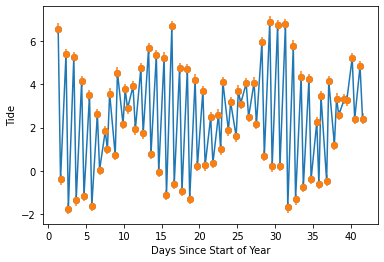

In [66]:
arr = np.loadtxt('ASTR19_S22_group_project_data.txt', skiprows=3, dtype='str')
def np_to_list(arr):
  nums = []
  for elem in arr:
    t1 = int(elem[0])
    t2 = elem[1]
    t3 = float(elem[2])
    nums.append((t1, t2, t3))
  return nums

data = np_to_list(arr)
x_col = []
y_col = []
#print(data)
for d in data:
  tide = d[2]
  day = d[0]
  time = d[1]
  #print(time)
  temp = time.split(':')
  new_time = int(temp[0])*60
  new_time += int(temp[1])
  new_time /= (24*60)
  x_col.append(day+new_time)
  y_col.append(tide)

#print(x_col)
#print(y_col)
X = np.array(x_col)
y = np.array(y_col)

plt.plot(X,y, marker='o')
plt.errorbar(X, y, yerr=0.25, fmt='o')
plt.xlabel('Days Since Start of Year')
plt.ylabel('Tide')
plt.show()

0.3996304101147925 0.4209121593106554 4.441150746887925 2.4768350380639093


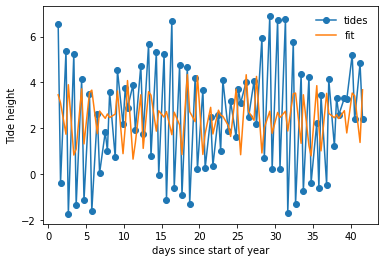

In [67]:
#define an oscillatory function
#func = (np.sin(a*X)+np.sin(b*X))*np.sin(c*X) + d
sig = np.full(len(x_col),0.25)

#2 main oscillations within the whole oscillatory graph: larger one with a period of around 17 days and smaller one with around 10 days

#define the function to fit
 
def fit_line(X,a,b,c,d,e,f,g):
    return ((e*np.cos(a*X))+ (f*np.sin(b*X)))*(g*np.sin(c*X)) + d

#perform the fit
p0 = [0.4, 0.4, 4.4, 6, 15, 15, 15]
params,params_cov = optimize.curve_fit(fit_line,X,y_col,sigma = sig, p0=p0)

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]
e_fit = params[4]
f_fit = params[5]
g_fit = params[6]

print(a_fit,b_fit,c_fit,d_fit)

y_fit = ((np.sin(a_fit*X))+(np.sin(b_fit*X)))*(np.cos(c_fit*X)) + d_fit

# model = np.poly1d(np.polyfit(X, y, 30))
# line = np.linspace(min(X), max(X), 10000)
f = plt.figure()
#plt.errorbar(X,y_col,yerr = 0.25,fmt = 'o', label = 'data')
plt.plot(X,y_col,marker = 'o', label = 'tides')
plt.plot(X,y_fit,label='fit')

f.savefig('figure.pdf', dpi=f.dpi ,format='pdf')
#plt.plot(line, model(line), label ='fit2')

plt.xlabel('days since start of year')
plt.ylabel('Tide height')
plt.legend(loc=0, frameon = False)


2.6000512363555712


Text(0, 0.5, 'Tide height')

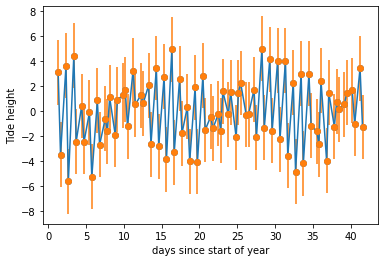

In [68]:
# plot the residuals
y_res = y_col - y_fit
plt.plot(X, y_res, marker='o', label='residuals')
e = np.std(y_res)
print(e)
plt.errorbar(X, y_res, yerr=e, fmt='o')
plt.xlabel('days since start of year')
plt.ylabel('Tide height')

mean =  -0.0083830169093999
standard deviation =  2.6000512363555712
variance =  6.760266431674133


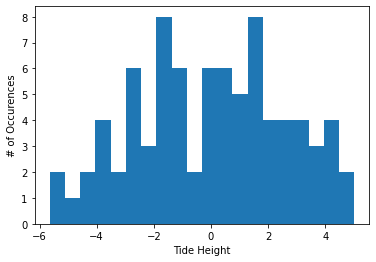

In [69]:
fig = plt.figure()
plt.hist(y_res, bins=20)
plt.xlabel('Tide Height')
plt.ylabel('# of Occurences')
fig.savefig('hist.pdf', format='pdf', dpi=fig.dpi)
print('mean = ', np.mean(y_res))
print('standard deviation = ', np.std(y_res))
norm_std = np.std(y_col)
print('variance = ', np.var(y_res))

Number of Deviations from std or normal tides to the Tsunami 0.8233077322663461


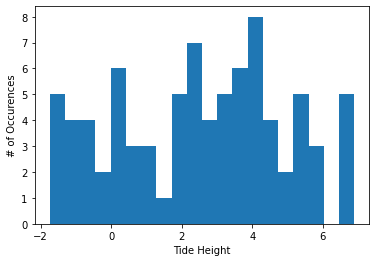

In [70]:
#add 2 foot outlier
#index 27 is high tide on jan 14
y_col[27] = y_col[27]+2
plt.hist(y_col, bins=20)
plt.xlabel('Tide Height')
plt.ylabel('# of Occurences')
print('Number of Deviations from std or normal tides to the Tsunami', float(y_col[27]/norm_std))